<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Parcial3Dinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Markov : Cadena de Producción
import numpy as np
import matplotlib.pyplot as plt

(a)

**Estado del producto en la estación de producción:**

- Avanza a la estación de empaque: Probabilidad = 90%.
- Tiene defecto y permanece en la producción: Probabilidad = 10%.


**Estado del producto en la estación de empaque:**

- Es enviado al mercado: Probabilidad = 95%.
- Permanece en la estación de empaque: Probabilidad = 5%.

In [4]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [5]:
# c)
TM = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.00,0.00,1.00]])

In [6]:
# d)
n = TM.shape[0]
A = np.vstack((TM.T - np.eye(n), np.ones(n)))
b = np.zeros(n + 1)
b[-1] = 1

pi = np.linalg.lstsq(A, b, rcond=None)[0]
pi

array([ 1.59731365e-16, -1.11022302e-16,  1.00000000e+00])

In [7]:
# Pi = [0, 0, 1].  La interpretación es que el producto tiende a estar en la manos del cliente el 100 % del tiempo

In [8]:
# e) P(S1 ∩ S2)
Py = pi[0]*pi[1]
Py

-1.7733743924663986e-32

In [9]:
# f) P(S1 U S2)
Po = pi[0] + pi[1]
Po

4.8709062599485396e-17

In [10]:
# g) P(S1^c)
Pv = 1 - (pi[0] + pi[1])
Pv

1.0

In [11]:
# Markov: : Cadena de Producción con devolución de producto

(a)

**Estado del producto en la estación de producción:**

- Avanza a la estación de empaque: Probabilidad = 90%
- Tiene defecto y permanece en la producción: Probabilidad = 10%


**Estado del producto en la estación de empaque:**

- Es enviado al mercado: Probabilidad = 95%
- Permanece en la estación de empaque: Probabilidad = 5%


**Estado del producto en las manos del cliente:**

- Permanece en las manos del cliente= 98%
- El producto es devuelto y va directamente a producción: 2%


In [12]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [13]:
TMD = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.02,0.00,0.98]])

In [14]:
# d)
n = TMD.shape[0]
A = np.vstack((TMD.T - np.eye(n), np.ones(n)))
b = np.zeros(n + 1)
b[-1] = 1

pid = np.linalg.lstsq(A, b, rcond=None)[0]
pid

array([0.02130045, 0.02017937, 0.95852018])

In [15]:
#Pid. La interpretación es que el producto tiende a estar, aproximadamente, el 2,1 % del tiempo en producción, el 2 % en empaquetado y el 95,9 % en las manos del cliente

In [16]:
# e) P(S1 ∩ S2)
Pyd = pid[0]*pid[1]
np.round(Pyd,5)

0.00043

In [17]:
# f) P(S1 U S2)
Pod = pid[0] + pid[1]
np.round(Pod,4)

0.0415

In [18]:
# g) P(S1^c)
Pvd = 1 - (pid[0] + pid[1])
np.round(Pvd,4)

0.9585

In [47]:
# Hidden Markov: Casino tramposo

# a)
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Moneda=np.array([0,1])
Prior=np.array([0.2,0.8])
Obs=np.array([1,0,0,0,1,0,1,0])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

DictHidden = {0:'Justa',1:'Sesgada'}

DictObs = {0:'Cara',1:'Sello'}

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

HiddenStates=GetStates(Moneda,8)

# b)
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.

  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

[[1 1 1 1 0 0 0 0]] [0.0001911]


In [56]:
#(c)
import pandas as pd

def data_20(ObsStates, PObs):
    t = 0
    for i in range(len(PObs)):
        t += PObs[i]
        if t >= 0.2:
            break

    # Convertir las secuencias en cadenas de texto para que queden en una sola columna
    sequences = [''.join(map(str, seq)) for seq in ObsStates[:i+1]]

    # Crear el DataFrame
    df = pd.DataFrame({
        'Secuencia': sequences,
        'Probabilidad': PObs[:i+1]
    })

    # Ordenar por probabilidad en orden descendente
    df = df.sort_values(by='Probabilidad', ascending=False)

    # Calcular la suma acumulada de las probabilidades
    df['Suma'] = df['Probabilidad'].cumsum()

    return df

# Llamar a la función con los datos
result_df = data_20(ObsStates, PObs)
result_df


,Secuencia,Probabilidad,Suma
0,00000000,0.136982,0.136982
1,00000001,0.041149,0.178132
2,00000010,0.034737,0.212869


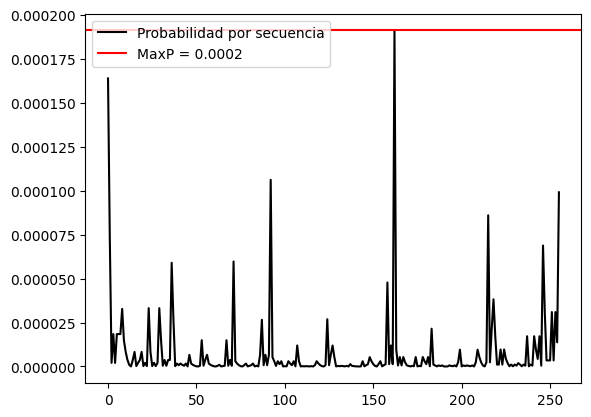

In [48]:
# d)
plt.plot(P, color='k', label= 'Probabilidad por secuencia')
plt.axhline(np.max(P), color='r', label = 'MaxP = ' + str(np.round(np.max(P),4)))
plt.legend()
plt.show()

In [22]:
# e)
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [23]:
# f)
np.sum(PObs)

1.0000000000000007

(g)

Sí, el resultado depende de la probabilidad a-priori porque esta representa la distribución inicial de los estados ocultos antes de observar los datos. Si se modifican las probabilidades a-priori, el cálculo de las probabilidades conjuntas y condicionales para las secuencias ocultas también cambiará, afectando las secuencias más probables. Sin embargo, su influencia disminuye a medida que se tienen más observaciones, ya que los datos observados ganan mayor peso en las estimaciones.

(h)

Si quisiera estimar las matrices de transición y emisión, un enfoque metodológico sería emplear redes neuronales, las cuales son adecuadas para modelar secuencias temporales. En este enfoque, los robots podrían ser entrenados para predecir el siguiente estado observable dado el histórico de observaciones, mientras que las probabilidades de transición y emisión se aprenderían como pesos internos de la red.



In [25]:
# Maxwell-Boltzmann distribution

#a)
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"

df = pd.read_csv(url)
df.to_csv('Maxwell.csv', index=False)

Maxwell = pd.read_csv('Maxwell.csv')
Maxwell

,Velocidad
0,547.265773
1,449.920418
2,773.814382
3,823.668389
4,352.873887
...,...
2995,601.470068
2996,508.491149
2997,594.981398
2998,376.388615


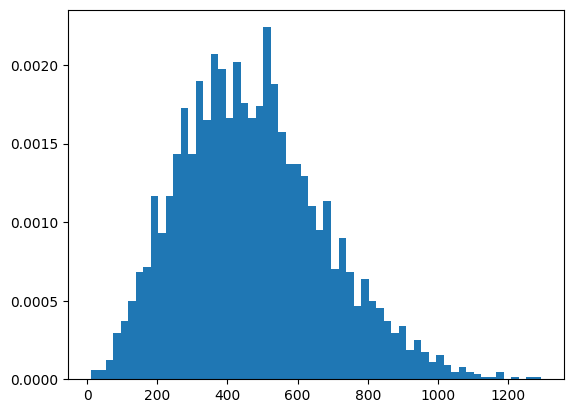

In [26]:
#b)
histograma = plt.hist(Maxwell, bins=60, density=True)

In [27]:
# c)
promedio = np.mean(histograma[0])
promedio

0.0007777147550061165

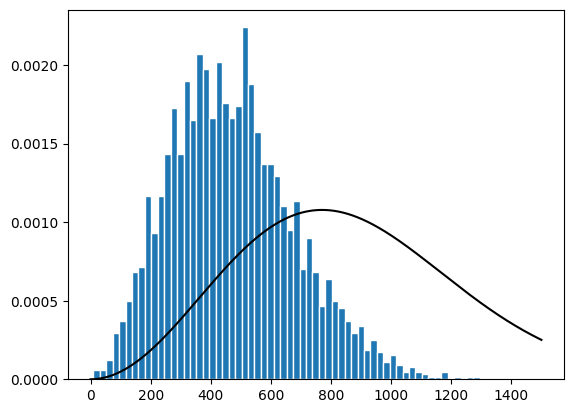

In [46]:
# d)
V = Maxwell['Velocidad']

def likelihood(T,v):
  epsilon = 1e-10  # Un valor pequeño
  result = ((0.028 / (2 * np.pi * 8.31 * T))**(3/2)) * (4 * np.pi * (v**2) * np.exp(-0.028 * v**2 / (2 * 8.31 * T)))
  return result + epsilon  # Sumar epsilon

plt.hist(V, bins=60, density=True, edgecolor='white')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(1000,x), color='k')
plt.show()

In [29]:
# e)
def JointLikelihood(T,v):
  try:
    result = -np.sum(np.log(likelihood(T, v)))
  except ZeroDivisionError:
    result = float('inf')  # Asignar un valor grande en caso de error
  return result

p0 = 100
import scipy.optimize as spo
result = spo.minimize(JointLikelihood,p0,args=(V))
result.x

array([297.89452501])

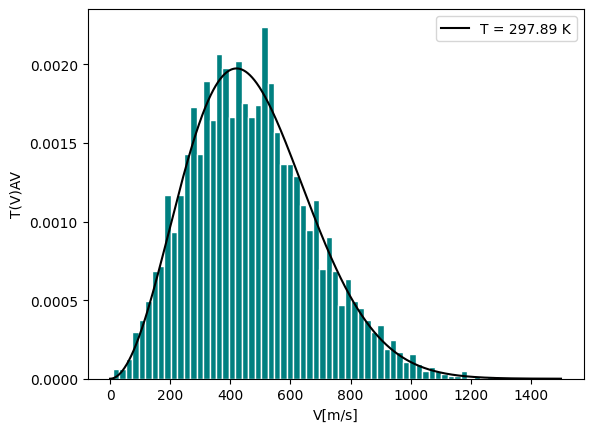

In [30]:
plt.hist(V, bins=60, density=True, color='teal', edgecolor='white')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(result.x,x), color='k', label='T = ' + str(np.round(result.x[0],2)) +" K")
plt.xlabel('V[m/s]')
plt.ylabel('T(V)AV')
plt.legend()
plt.show()

In [31]:
# f)
vp = np.sqrt(2 * 8.31 * result.x / 0.028)
vp

array([420.5016989])

In [32]:
# g)
vm = (2/np.sqrt(np.pi)) * vp
vm

array([474.48535676])

In [33]:
# h)
v2 = np.sqrt(3 * 8.31 * result.x / 0.028)
v2

array([515.00729914])

In [60]:
# i)
import numpy as np
import pandas as pd

def metropolis_hastings(v_data, T_init=300, n_samples=10000, step_size=5):
    T_chain = [T_init]
    for _ in range(n_samples):
        T_current = T_chain[-1]
        T_proposed = np.abs(T_current + np.random.normal(0, step_size))  # Evitar T negativo

        # Calculate likelihood ratio for all data points
        r = likelihood(T_proposed, v_data) / likelihood(T_current, v_data)

        # Convert r to numpy array if it's a pandas Series
        if isinstance(r, pd.Series):
            r = r.values

        # Accept or reject the proposal for each data point individually
        # and update the chain accordingly
        for r_i in r:
            if np.random.rand() < min(1, r_i):
                T_chain.append(T_proposed)
            else:
                T_chain.append(T_current)

    return np.array(T_chain)

# Ejecutar el algoritmo
T_samples = metropolis_hastings(V)
T_mean = np.mean(T_samples)
T_std = np.std(T_samples)

In [62]:
T_std

122.96708899827718

<ipython-input-90-0c9e42b2d41c>:15: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = likelihood_proposed / likelihood_current


Temperatura estimada (T): 300.00 K
Valor crítico superior (T_up): 300.00 K


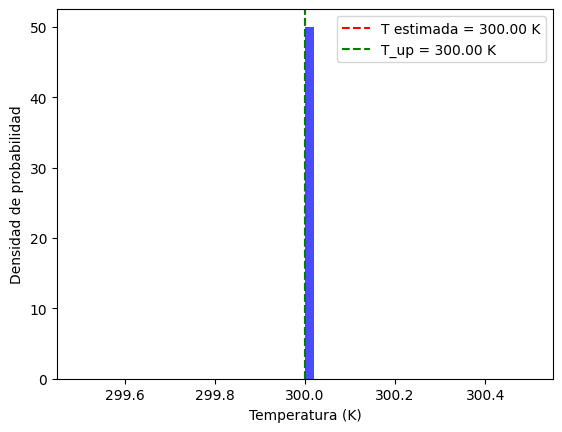

In [90]:
def metropolis_hastings(data, n_iter=20000, T_init=300, step_size=1):
    T_values = [T_init]
    current_T = T_init

    for _ in range(n_iter):
        proposed_T = current_T + np.random.uniform(-step_size, step_size)
        if proposed_T <= 0:  # Rechazar temperaturas negativas o cero
            continue

        # Calcular likelihood
        likelihood_current = np.prod(likelihood(data, current_T))
        likelihood_proposed = np.prod(likelihood(data, proposed_T))

        # Aceptar o rechazar
        acceptance_ratio = likelihood_proposed / likelihood_current
        if acceptance_ratio >= 1 or np.random.rand() < acceptance_ratio:
            current_T = proposed_T

        T_values.append(current_T)

    return np.array(T_values)

# Ejecutar Metropolis-Hastings
T_samples = metropolis_hastings(V)

# Estimar T y calcular intervalo de confianza
T_estimada = np.mean(T_samples)
percentil_95 = np.percentile(T_samples, 95)

print(f"Temperatura estimada (T): {T_estimada:.2f} K")
print(f"Valor crítico superior (T_up): {percentil_95:.2f} K")

# Graficar distribución posterior de T
plt.hist(T_samples, bins=50, density=True, alpha=0.7, color='blue')
plt.axvline(T_estimada, color='red', linestyle='--', label=f'T estimada = {T_estimada:.2f} K')
plt.axvline(percentil_95, color='green', linestyle='--', label=f'T_up = {percentil_95:.2f} K')
plt.xlabel("Temperatura (K)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()

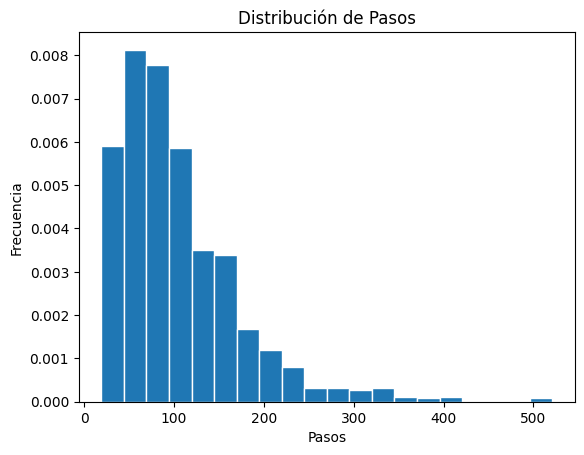

In [36]:
# Fotones

# a)
N = 1000
Rs = 1.0
l = 0.1

pasos_totales = []

for _ in range(N):
    x, y, z = 0.0, 0.0, 0.0
    pasos = 0

    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        theta = np.random.uniform(0, 2*np.pi)
        phi = np.random.uniform(0, np.pi)

        x += l * np.sin(phi) * np.cos(theta)
        y += l * np.sin(phi) * np.sin(theta)
        z += l * np.cos(phi)

        pasos += 1

    pasos_totales.append(pasos)

pasos_totales = np.array(pasos_totales)

pasos_totales

plt.hist(pasos_totales, bins=20, density=True, edgecolor='white')
plt.xlabel('Pasos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pasos')
plt.show()

In [37]:
# b)
n = 20
min_pasos, max_pasos = pasos_totales.min(), pasos_totales.max()
clases = np.linspace(min_pasos, max_pasos, n + 1)
puntos_medios = (clases[:-1] + clases[1:]) / 2

In [38]:
# c)
frecuencias, _ = np.histogram(pasos_totales, bins=clases)
frecuencias_normalizadas = frecuencias / N
frecuencias_normalizadas

array([0.148, 0.204, 0.195, 0.147, 0.088, 0.085, 0.042, 0.03 , 0.02 ,
       0.008, 0.008, 0.007, 0.008, 0.003, 0.002, 0.003, 0.   , 0.   ,
       0.   , 0.002])

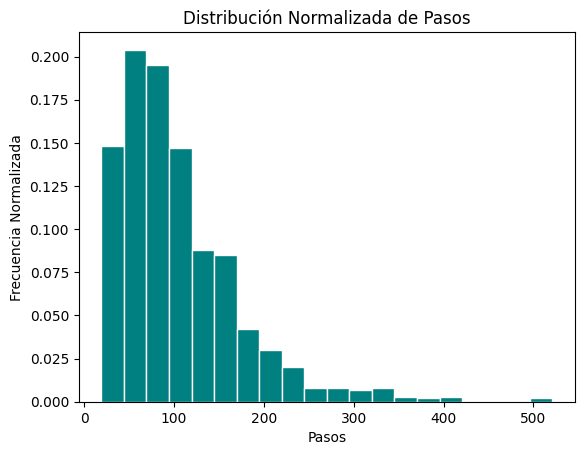

In [39]:
plt.bar(puntos_medios, frecuencias_normalizadas, width=np.diff(clases), edgecolor="white", align="center", color="teal")
plt.xlabel('Pasos')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución Normalizada de Pasos')
plt.show()

In [40]:
valor_esperado = np.sum(frecuencias_normalizadas * puntos_medios)
valor_esperado

104.56590000000001

In [41]:
Ve = np.mean(pasos_totales)
Ve

104.822

In [42]:
# f)
Valor_pasos = (Rs/l)**2
Valor_pasos

100.0

In [43]:
# g)
Lr = 0.000006
Rsr = 700000
c = 300000
T = (Rs**2)/Lr*c
T

50000000000.0

In [44]:
anios = T / (60*60*24*365)
anios

1585.4895991882292

In [45]:
# h)
from scipy.stats import exponweib
a,c,d,e = exponweib.fit(frecuencias_normalizadas)
a,c,d,e

(1.13476075855271,
 0.4989056208835205,
 -3.228274034854127e-32,
 0.026484670128764157)